<a href="https://colab.research.google.com/github/Chaitanya-Shikhare/Football-Penalty-Prediction/blob/main/Football_Penalty_Prediction_improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("penalty.csv")
df.head()

,index,period,minute,second,possession,duration,statsbomb_xg,penalty_taken_at_home,home_score,away_score,match_week,player_team_name,player_name,player_position,foot,technique,keeper_name,keeper_team_name,competition_name,competition_stage,stadium,direction,outcome
0,0,2,92,5,149,0.478400,0.76,1.0,8.0,2.0,3.0,9,107,9,1,1,17,38,3,3,5,8,1
1,1,2,62,21,158,0.769673,0.76,1.0,4.0,2.0,9.0,9,107,3,1,1,132,80,3,3,5,5,1
2,2,2,67,17,155,0.707958,0.76,1.0,3.0,4.0,12.0,9,104,22,0,1,102,72,3,3,5,9,1
3,3,1,31,51,59,0.522165,0.76,0.0,2.0,2.0,22.0,79,31,10,1,1,90,11,3,3,5,4,1
4,4,1,38,43,70,0.321987,0.76,1.0,2.0,2.0,22.0,9,104,22,0,1,101,95,3,3,5,2,1


In [3]:
df.describe()

,index,period,minute,second,possession,duration,statsbomb_xg,penalty_taken_at_home,home_score,away_score,match_week,player_team_name,player_name,player_position,foot,technique,keeper_name,keeper_team_name,competition_name,competition_stage,stadium,direction,outcome
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,3.520000e+02,350.000000,350.000000,350.000000,350.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,175.500000,2.343750,69.321023,29.519886,143.522727,0.589386,7.600000e-01,0.605714,2.088571,1.517143,12.642857,30.937500,96.500000,10.974432,0.667614,0.985795,71.789773,41.974432,2.650568,2.664773,35.142045,5.781250,0.750000
std,101.757883,1.439577,35.823273,17.672541,74.712246,0.239586,3.668951e-15,0.489396,1.670796,1.250097,10.891015,24.675248,45.697631,7.387286,0.471739,0.118502,39.426532,29.724124,1.588796,1.120189,27.642142,2.563249,0.433629
min,0.000000,1.000000,1.000000,0.000000,3.000000,0.038319,7.600000e-01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,87.750000,1.000000,40.750000,14.000000,85.000000,0.445020,7.600000e-01,0.000000,1.000000,1.000000,4.000000,9.000000,62.750000,3.000000,0.000000,1.000000,36.000000,12.000000,2.000000,3.000000,5.000000,4.000000,0.750000
50%,175.500000,2.000000,68.500000,31.000000,144.000000,0.542750,7.600000e-01,1.000000,2.000000,1.000000,7.000000,24.000000,104.000000,11.000000,1.000000,1.000000,71.000000,34.000000,3.000000,3.000000,34.500000,5.000000,1.000000
75%,263.250000,2.000000,92.000000,45.000000,194.000000,0.668588,7.600000e-01,1.000000,3.000000,2.000000,21.000000,54.250000,133.250000,18.000000,1.000000,1.000000,100.000000,71.250000,3.000000,3.000000,64.000000,8.000000,1.000000
max,351.000000,5.000000,128.000000,59.000000,302.000000,2.160000,7.600000e-01,1.000000,11.000000,8.000000,38.000000,82.000000,176.000000,24.000000,1.000000,1.000000,138.000000,99.000000,7.000000,6.000000,75.000000,9.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  352 non-null    int64  
 1   period                 352 non-null    int64  
 2   minute                 352 non-null    int64  
 3   second                 352 non-null    int64  
 4   possession             352 non-null    int64  
 5   duration               352 non-null    float64
 6   statsbomb_xg           352 non-null    float64
 7   penalty_taken_at_home  350 non-null    float64
 8   home_score             350 non-null    float64
 9   away_score             350 non-null    float64
 10  match_week             350 non-null    float64
 11  player_team_name       352 non-null    int64  
 12  player_name            352 non-null    int64  
 13  player_position        352 non-null    int64  
 14  foot                   352 non-null    int64  
 15  techni

In [5]:
df.isnull().sum()

index                    0
period                   0
minute                   0
second                   0
possession               0
duration                 0
statsbomb_xg             0
penalty_taken_at_home    2
home_score               2
away_score               2
match_week               2
player_team_name         0
player_name              0
player_position          0
foot                     0
technique                0
keeper_name              0
keeper_team_name         0
competition_name         0
competition_stage        0
stadium                  0
direction                0
outcome                  0
dtype: int64

In [6]:
df["penalty_taken_at_home"].fillna(df["penalty_taken_at_home"].mean(),inplace=True)
df["home_score"].fillna(df["home_score"].mean(),inplace=True)
df["away_score"].fillna(df["away_score"].mean(),inplace=True)
df["match_week"].fillna(df["match_week"].mean(),inplace=True)
df.isnull().sum()

index                    0
period                   0
minute                   0
second                   0
possession               0
duration                 0
statsbomb_xg             0
penalty_taken_at_home    0
home_score               0
away_score               0
match_week               0
player_team_name         0
player_name              0
player_position          0
foot                     0
technique                0
keeper_name              0
keeper_team_name         0
competition_name         0
competition_stage        0
stadium                  0
direction                0
outcome                  0
dtype: int64

In [7]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X, y

(array([[  0.,   2.,  92., ...,   3.,   5.,   8.],
        [  1.,   2.,  62., ...,   3.,   5.,   5.],
        [  2.,   2.,  67., ...,   3.,   5.,   9.],
        ...,
        [349.,   2.,  63., ...,   3.,  24.,   1.],
        [350.,   2.,  47., ...,   3.,  26.,   9.],
        [351.,   2.,  86., ...,   3.,   5.,   8.]]),
 array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
        1, 1,

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [9]:
X_test

array([[  6.,   2.,  84., ...,   3.,   5.,   8.],
       [ 52.,   2.,  61., ...,   3.,   1.,   6.],
       [259.,   2.,  71., ...,   3.,  13.,   9.],
       ...,
       [ 22.,   2.,  47., ...,   0.,  62.,   9.],
       [340.,   5., 125., ...,   2.,  43.,   5.],
       [309.,   5., 124., ...,   4.,  65.,   2.]])

In [10]:
X_train

array([[142.,   2.,  52., ...,   3.,  21.,   7.],
       [258.,   1.,  22., ...,   3.,  13.,   5.],
       [ 66.,   2.,  65., ...,   3.,  46.,   9.],
       ...,
       [117.,   1.,  38., ...,   3.,   5.,   4.],
       [ 47.,   2.,  55., ...,   3.,  66.,   6.],
       [172.,   2.,  73., ...,   3.,  75.,   8.]])

In [11]:
y_train

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1])

In [12]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1])

In [13]:
#sns.pairplot(df, hue='outcome', size=5)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train

array([[-0.36036894, -0.27400341, -0.49937907, ...,  0.29662877,
        -0.54793988,  0.49852074],
       [ 0.76724304, -0.95004922, -1.32164148, ...,  0.29662877,
        -0.83826828, -0.28023355],
       [-1.09914921, -0.27400341, -0.14306535, ...,  0.29662877,
         0.35933639,  1.27727502],
       ...,
       [-0.60338877, -0.95004922, -0.88310153, ...,  0.29662877,
        -1.12859669, -0.66961069],
       [-1.28384427, -0.27400341, -0.41715283, ...,  0.29662877,
         1.0851574 ,  0.10914359],
       [-0.06874515, -0.27400341,  0.07620462, ...,  0.29662877,
         1.41177685,  0.88789788]])

In [16]:
X_test

array([[-1.68239678, -0.27400341,  0.37770084, ...,  0.29662877,
        -1.12859669,  0.88789788],
       [-1.23524031, -0.27400341, -0.25270034, ...,  0.29662877,
        -1.27376089,  0.10914359],
       [ 0.77696383, -0.27400341,  0.02138713, ...,  0.29662877,
        -0.83826828,  1.27727502],
       ...,
       [-1.5268641 , -0.27400341, -0.6364228 , ..., -2.34303396,
         0.9399932 ,  1.27727502],
       [ 1.56434806,  1.75413401,  1.50145948, ..., -0.58325881,
         0.25046324, -0.28023355],
       [ 1.26300348,  1.75413401,  1.47405073, ...,  1.17651634,
         1.04886635, -1.44836498]])

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 2 17]
 [ 1 68]]


0.7954545454545454

In [20]:
import statsmodels.api as sm

logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


         Current function value: 0.506086
         Iterations: 35
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.119   
Dependent Variable: y                AIC:              311.2136
Date:               2021-07-08 12:11 BIC:              389.8845
No. Observations:   264              Log-Likelihood:   -133.61 
Df Model:           21               LL-Null:          -151.66 
Df Residuals:       242              LLR p-value:      0.021246
Converged:          0.0000           Scale:            1.0000  
No. Iterations:     35.0000                                    
----------------------------------------------------------------
            Coef.   Std.Err.     z     P>|z|    [0.025    0.975]
----------------------------------------------------------------
x1         -0.1326    0.1872  -0.7081  0.4789   -0.4994   0.2343
x2          0.1013    0.4073   0.2488  0.8035   -0.6970   0.8997
x3          1.1704    0.8521   1.3736  0.1696   -0.4997   

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [26]:
classifier.fit(X_train, y_train)
predicitions = classifier.predict_proba(X_test)
predicitions_probs = predicitions[:, 1]

Best Threshold=0.757816, G-Mean=0.670


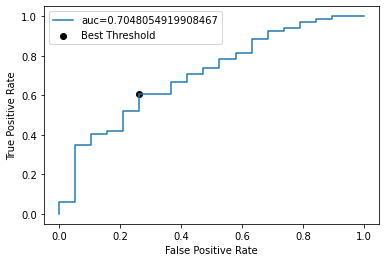

In [33]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, predicitions_probs)
auc = roc_auc_score(y_test, predicitions_probs)
gmeans = np.sqrt(tpr * (1-fpr))
best_threshold = _[np.argmax(gmeans)]
print('Best Threshold=%f, G-Mean=%.3f' % (best_threshold, gmeans[np.argmax(gmeans)]))

plt.plot(fpr,tpr,label="auc="+str(auc))
plt.scatter(fpr[np.argmax(gmeans)], tpr[np.argmax(gmeans)], color='black', label='Best Threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

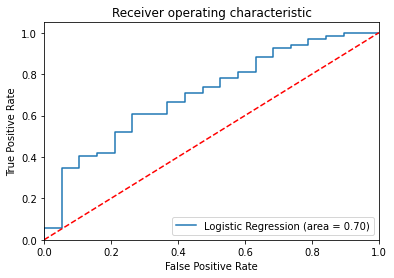

In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, predicitions_probs)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [35]:
# Import required libraries for performance metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

# Define dictionary with performance metrics
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

# Import required libraries for machine learning classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Instantiate the machine learning classifiers
log_model = LogisticRegression(max_iter=100000)
svc_model = LinearSVC(dual=False)
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
gnb_model = GaussianNB()

# Define the models evaluation function
def models_evaluation(X, y, folds):
    
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds
    
    '''
    
    # Perform cross-validation to each machine learning classifier
    log = cross_validate(log_model, X, y, cv=folds, scoring=scoring)
    svc = cross_validate(svc_model, X, y, cv=folds, scoring=scoring)
    dtr = cross_validate(dtr_model, X, y, cv=folds, scoring=scoring)
    rfc = cross_validate(rfc_model, X, y, cv=folds, scoring=scoring)
    gnb = cross_validate(gnb_model, X, y, cv=folds, scoring=scoring)

    # Create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision'].mean(),
                                                               log['test_recall'].mean(),
                                                               log['test_f1_score'].mean()],
                                       
                                      'Support Vector Classifier':[svc['test_accuracy'].mean(),
                                                                   svc['test_precision'].mean(),
                                                                   svc['test_recall'].mean(),
                                                                   svc['test_f1_score'].mean()],
                                       
                                      'Decision Tree':[dtr['test_accuracy'].mean(),
                                                       dtr['test_precision'].mean(),
                                                       dtr['test_recall'].mean(),
                                                       dtr['test_f1_score'].mean()],
                                       
                                      'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1_score'].mean()],
                                       
                                      'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),
                                                              gnb['test_precision'].mean(),
                                                              gnb['test_recall'].mean(),
                                                              gnb['test_f1_score'].mean()]},
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)
  
# Run models_evaluation function
# models_evaluation(X, y, 5)

In [37]:
models_evaluation(X_train, y_train, 5)
#models_evaluation(agg_X_train, agg_y_train,5)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Logistic Regression,Support Vector Classifier,Decision Tree,Random Forest,Gaussian Naive Bayes,Best Score
Accuracy,0.765312,0.761466,0.666836,0.727286,0.272642,Logistic Regression
Precision,0.769388,0.764542,0.761998,0.751231,0.600000,Logistic Regression
Recall,0.974359,0.979487,0.794872,0.943590,0.025641,Support Vector Classifier
F1 Score,0.859806,0.858527,0.776462,0.836254,0.049024,Logistic Regression


In [43]:
coefficients = pd.concat([pd.DataFrame(X),pd.DataFrame(np.transpose(classifier.coef_))], axis = 1)


coefficients

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,0
0,0.0,2.0,92.0,5.0,149.0,0.478400,0.76,1.0,8.0,2.0,3.0,9.0,107.0,9.0,1.0,1.0,17.0,38.0,3.0,3.0,5.0,8.0,-0.055748
1,1.0,2.0,62.0,21.0,158.0,0.769673,0.76,1.0,4.0,2.0,9.0,9.0,107.0,3.0,1.0,1.0,132.0,80.0,3.0,3.0,5.0,5.0,0.172587
2,2.0,2.0,67.0,17.0,155.0,0.707958,0.76,1.0,3.0,4.0,12.0,9.0,104.0,22.0,0.0,1.0,102.0,72.0,3.0,3.0,5.0,9.0,0.452149
3,3.0,1.0,31.0,51.0,59.0,0.522165,0.76,0.0,2.0,2.0,22.0,79.0,31.0,10.0,1.0,1.0,90.0,11.0,3.0,3.0,5.0,4.0,-0.078622
4,4.0,1.0,38.0,43.0,70.0,0.321987,0.76,1.0,2.0,2.0,22.0,9.0,104.0,22.0,0.0,1.0,101.0,95.0,3.0,3.0,5.0,2.0,-0.726459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,347.0,1.0,20.0,1.0,43.0,0.671000,0.76,1.0,6.0,1.0,5.0,9.0,104.0,3.0,0.0,1.0,94.0,29.0,3.0,3.0,5.0,4.0,NaN
348,348.0,2.0,69.0,39.0,145.0,0.437000,0.76,1.0,4.0,0.0,16.0,9.0,104.0,18.0,0.0,1.0,114.0,27.0,3.0,3.0,5.0,1.0,NaN
349,349.0,2.0,63.0,29.0,130.0,0.847593,0.76,0.0,0.0,3.0,17.0,9.0,104.0,9.0,0.0,1.0,82.0,73.0,3.0,3.0,24.0,1.0,NaN
350,350.0,2.0,47.0,50.0,106.0,0.581456,0.76,1.0,1.0,1.0,26.0,43.0,84.0,3.0,1.0,1.0,90.0,11.0,3.0,3.0,26.0,9.0,NaN


In [45]:
classifier.coef_

array([[-5.57475163e-02,  1.72587323e-01,  4.52148587e-01,
        -7.86222284e-02, -7.26458771e-01,  6.46447877e-01,
         6.12942662e-04,  2.60014591e-03,  2.96088976e-01,
         2.08393153e-01,  2.11371588e-01, -1.37578895e-02,
         1.00472726e-01, -4.23582179e-02,  1.06525412e-01,
        -3.27119726e-01, -3.62633027e-01, -2.35047967e-02,
         2.33583703e-01, -2.67300090e-01, -1.30888048e-01,
         2.03152316e-02]])

In [62]:
pd.DataFrame(np.transpose(classifier.coef_))

,0
0,-0.055748
1,0.172587
2,0.452149
3,-0.078622
4,-0.726459
5,0.646448
6,0.000613
7,0.002600
8,0.296089
9,0.208393


In [63]:
import statsmodels.api as sm

logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.506086
         Iterations: 35
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.119   
Dependent Variable: y                AIC:              311.2136
Date:               2021-07-08 12:50 BIC:              389.8845
No. Observations:   264              Log-Likelihood:   -133.61 
Df Model:           21               LL-Null:          -151.66 
Df Residuals:       242              LLR p-value:      0.021246
Converged:          0.0000           Scale:            1.0000  
No. Iterations:     35.0000                                    
----------------------------------------------------------------
            Coef.   Std.Err.     z     P>|z|    [0.025    0.975]
----------------------------------------------------------------
x1         -0.1326    0.1872  -0.7081  0.4789   -0.4994   0.2343
x2          0.1013    0.4073   0.2488  0.8035   -0.6970   0.8997
x3          1.1704    0.8521   1.3736  0.1696   -0.4997   

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.11      0.18        19
           1       0.80      0.99      0.88        69

    accuracy                           0.80        88
   macro avg       0.73      0.55      0.53        88
weighted avg       0.77      0.80      0.73        88

